In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import floating_stocks_index as fsi
import historical_prices_kor

In [2]:
top10 = fsi.top_10()

In [3]:
start = '2017-01-01'
end = '2017-12-31'

top10_index = {}

for stock in top10.values():
    cd = stock[1]
    prices = historical_prices_kor.Prices()
    data = prices.prices_naver(cd, start_date=start, end_date=end)
    
    top10_index[stock[1]] = data

In [4]:
top10_price = pd.DataFrame(top10_index)

In [5]:
top10_price.head()

,005930,000660,005935,005380,068270,051910,207940,005490,012330,051900
2017-01-02,1805000,45800,1440000,150000,108200,253000,156500,260500,271500,817000
2017-01-03,1824000,47250,1439000,153000,106600,262000,158000,256000,275500,836000
2017-01-04,1808000,46500,1440000,154000,106100,268500,154500,254500,276000,851000
2017-01-05,1778000,46950,1414000,153500,106400,267500,157500,247500,280500,838000
2017-01-06,1810000,48000,1431000,151000,105300,266000,157500,250000,272500,850000


In [8]:
top10_price['005930'] = top10_price['005930'] / 50
top10_price['005935'] = top10_price['005935'] / 50

In [9]:
top10_price.head()

,005930,000660,005935,005380,068270,051910,207940,005490,012330,051900
2017-01-02,36100.0,45800,28800.0,150000,108200,253000,156500,260500,271500,817000
2017-01-03,36480.0,47250,28780.0,153000,106600,262000,158000,256000,275500,836000
2017-01-04,36160.0,46500,28800.0,154000,106100,268500,154500,254500,276000,851000
2017-01-05,35560.0,46950,28280.0,153500,106400,267500,157500,247500,280500,838000
2017-01-06,36200.0,48000,28620.0,151000,105300,266000,157500,250000,272500,850000


In [10]:
k10_fratio = {}
k10_name = {}
k10_outstanding = {}

In [11]:
for stock in top10.values():
    cd = stock[1]
    data = fsi.agg_value(cd)
    k10_fratio[cd] = data[1]
    k10_name[cd] = stock[0]
    k10_outstanding[cd] = data[2]

In [12]:
tmp = {'Outstanding':k10_outstanding,
      'Floating': k10_fratio,
      'Name': k10_name,
      'Price':top10_price.iloc[0]}

In [13]:
k10_info = pd.DataFrame(tmp)

In [14]:
k10_info

,Outstanding,Floating,Name,Price
000660,7.280024e+08,73.89,SK하이닉스,45800.0
005380,2.136682e+08,65.77,현대차,150000.0
005490,8.718684e+07,79.52,POSCO,260500.0
005930,5.969783e+09,78.79,삼성전자,36100.0
005935,5.969783e+09,78.79,삼성전자우,28800.0
012330,9.734386e+07,67.12,현대모비스,271500.0
051900,1.561820e+07,59.83,LG생활건강,817000.0
051910,7.059234e+07,64.28,LG화학,253000.0
068270,1.279535e+08,66.22,셀트리온,108200.0
207940,6.616500e+07,24.74,삼성바이오로직스,156500.0


In [15]:
k10_mc = top10_price * k10_info['Outstanding'] * k10_info['Floating'] * 0.01

In [16]:
k10_mc.head()

,000660,005380,005490,005930,005935,012330,051900,051910,068270,207940
2017-01-02,2.463678e+13,2.107943e+13,1.806072e+13,1.697997e+14,1.354634e+14,1.773905e+13,7.634348e+12,1.148032e+13,9.167873e+12,2.561783e+12
2017-01-03,2.541676e+13,2.150102e+13,1.774873e+13,1.715870e+14,1.353694e+14,1.800040e+13,7.811891e+12,1.188871e+13,9.032303e+12,2.586337e+12
2017-01-04,2.501332e+13,2.164155e+13,1.764473e+13,1.700819e+14,1.354634e+14,1.803307e+13,7.952057e+12,1.218366e+13,8.989938e+12,2.529045e+12
2017-01-05,2.525539e+13,2.157129e+13,1.715942e+13,1.672597e+14,1.330176e+14,1.832708e+13,7.830580e+12,1.213828e+13,9.015357e+12,2.578152e+12
2017-01-06,2.582021e+13,2.121996e+13,1.733274e+13,1.702700e+14,1.346168e+14,1.780439e+13,7.942712e+12,1.207022e+13,8.922153e+12,2.578152e+12


In [18]:
k10 = pd.DataFrame()

In [19]:
k10['K10 Market Cap'] = k10_mc.sum(axis=1)

In [24]:
k10['K10_index'] = k10['K10 Market Cap'] / k10['K10 Market Cap'][0] *100

In [25]:
k10.tail()

,K10 Market Cap,K10_index
2017-12-21,5.691895e+14,136.292539
2017-12-22,5.768628e+14,138.129896
2017-12-26,5.639388e+14,135.035243
2017-12-27,5.771908e+14,138.208445
2017-12-28,5.939100e+14,142.211848


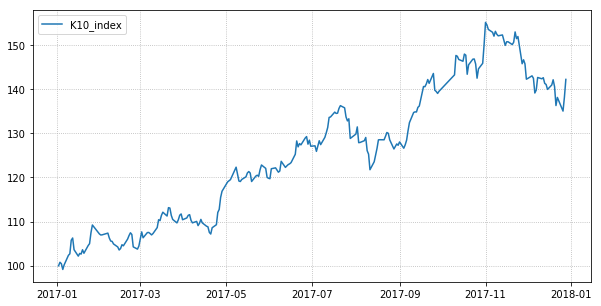

In [27]:
plt.figure(figsize=(10,5))
plt.plot(k10['K10_index'])
plt.legend(loc=0)
plt.grid(True, linestyle=':')

In [28]:
import historical_indices_kor

In [29]:
kospi200 = historical_indices_kor.historical_index_naver('KPI200', start_date='2017-01-01', end_date='2017-12-31')

In [34]:
K200 = pd.DataFrame({'K200':kospi200})

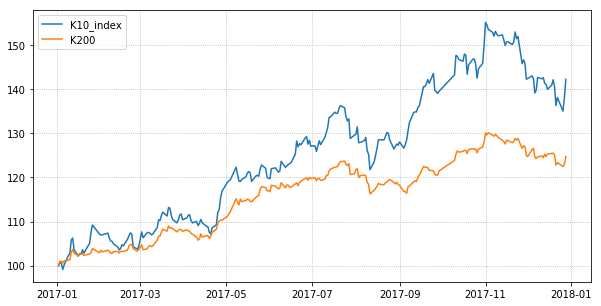

In [37]:
plt.figure(figsize=(10,5))
plt.plot(k10['K10_index'])
plt.plot(K200['K200'] / K200['K200'][0] * 100)
plt.legend(loc=0)
plt.grid(True, linestyle=':')